### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Сатлихана Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### **Вариант** **8**
No NaN **бин**
- Breast Cancer Wisconsin (Diagnostic) Data Set
- Название файла: wdbc.data
- Ссылка: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
- Класс: Outcome (столбец No 1)
- Метод обработки пропущенных значений – медиана класса
- Метод нормализации признаков – масштабирование на интервал [0, 1]
- Алгоритм снижения размерности данных – одномерный отбор признаков (SelectKBest)
- Дополнительные базовые классификаторы:
    - наивный байесовский классификатор
    - классификатор ближайших соседей (к-во соседей = 5)
- Комбинированный классификатор: VotingClassifier
- Ансамблевые классификаторы: BaggingClassifier, RandomForestClassifier
- Показатель качества модели – точность (precision)




In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [89]:
import pandas as pd

In [90]:
#  Загрузка набора данных
path = '/content/drive/MyDrive/University/Viti IV/1 SEMESTER/Интеллектуальный анализ данных/Lab 6/wdbc.data'
data = pd.read_csv(path, header=None)
# Извлечение класса (Outcome)
outcome = data[1]
print("\nКласс: Outcome (столбец No 1):")
print(outcome.head())



Класс: Outcome (столбец No 1):
0    M
1    M
2    M
3    M
4    M
Name: 1, dtype: object


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если в признаках пропущенных значений нет, то удалите из набора данных записи, идентифицированные как выбросы при помощи метода кластеризации DBSCAN.


In [91]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [92]:
missing_outcome = data[1].isnull().sum()
if missing_outcome > 0:
    print(f"Обнаружено {missing_outcome} пропущенных значений в столбце Outcome. Удаляем эти строки...")
    data = data.dropna(subset=[1])

In [93]:
label_encoder = LabelEncoder()
data[1] = label_encoder.fit_transform(data[1])
print("\nРезультаты кодирования меток в столбце Outcome:")
print(data[1].head())


Результаты кодирования меток в столбце Outcome:
0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64


In [94]:
# Проверка на пропущенные значения в признаках
missing_values = data.isnull().sum().sum()
if missing_values == 0:
    print("\nПропущенных значений нет. Идентификация выбросов с использованием DBSCAN.")


Пропущенных значений нет. Идентификация выбросов с использованием DBSCAN.


In [95]:
# Идентификация выбросов с использованием DBSCAN
# Стандартизация данных признаков
features = data.drop(columns=[0, 1])  # Исключаем столбцы ID и Outcome
if features.shape[0] > 0:
  features_standardized = StandardScaler().fit_transform(features)
  # Применение DBSCAN для определения выбросов
  clustering = DBSCAN(eps=2.0, min_samples=5).fit(features_standardized)
  # Добавление меток к данным
  data['outliers'] = clustering.labels_
  # Определение и удаление выбросов
  outliers = data[data['outliers'] == -1]
  print(f"\nОпределено {len(outliers)} выбросов.")
  # Удаление выбросов из набора данных
  data = data[data['outliers'] != -1]
  data = data.drop('outliers', axis=1)
  # Вывод преобразованного набора данных
  print("\nПреобразованный набор данных:")
  print(data.head())


Определено 371 выбросов.

Преобразованный набор данных:
         0   1      2      3       4       5        6        7        8   \
6    844359   1  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270   
16   848406   1  14.68  20.13   94.74   684.5  0.09867  0.07200  0.07395   
19  8510426   0  13.54  14.36   87.46   566.3  0.09779  0.08129  0.06664   
20  8510653   0  13.08  15.71   85.63   520.0  0.10750  0.12700  0.04568   
40   855167   1  13.44  21.58   86.18   563.0  0.08162  0.06031  0.03110   

         9   ...     22     23      24      25      26      27      28  \
6   0.07400  ...  22.88  27.66  153.20  1606.0  0.1442  0.2576  0.3784   
16  0.05259  ...  19.07  30.88  123.40  1138.0  0.1464  0.1871  0.2914   
19  0.04781  ...  15.11  19.26   99.70   711.2  0.1440  0.1773  0.2390   
20  0.03110  ...  14.50  20.49   96.09   630.5  0.1312  0.2776  0.1890   
40  0.02031  ...  15.93  30.25  102.50   787.9  0.1094  0.2043  0.2085   

         29      30       31  
6   0.1932

In [96]:
print(f"Оставшиеся строки в наборе данных: {data.shape[0]}")
print(data.shape)

Оставшиеся строки в наборе данных: 198
(198, 32)


3. Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных не более четырех признаков.

In [97]:
from sklearn.feature_selection import SelectKBest, f_classif

# Определение признаков и меток
X = data.drop(columns=[0, 1])  # Исключаем столбцы ID и Outcome
y = data[1]  # Столбец классов

# Применение SelectKBest для выбора 4 лучших признаков
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X, y)

# Получение индексов и оценок выбранных признаков
selected_indices = selector.get_support(indices=True)
selected_scores = selector.scores_[selected_indices]

# Создание нового DataFrame с выбранными признаками
selected_features = X.iloc[:, selected_indices]

# Добавление оценок к DataFrame
selected_feature_scores = pd.DataFrame({
    'признаки': selected_features.columns,
    'оценкa': selected_scores
}).sort_values(by='оценкa', ascending=False)

print("\nВыбранные признаки и их оценки:")
print(selected_feature_scores)

# Обновление набора данных с выбранными признаками
data_reduced = pd.concat([data[[0, 1]].reset_index(drop=True), selected_features.reset_index(drop=True)], axis=1)

print("\nОбновленный набор данных с выбранными признаками:")
print(data_reduced.head())



Выбранные признаки и их оценки:
  признаки      оценкa
3       25  256.636547
1       22  210.675361
2       24  202.967609
0       15  198.974932

Обновленный набор данных с выбранными признаками:
        0   1      15     22      24      25
0   844359   1  53.91  22.88  153.20  1606.0
1   848406   1  45.40  19.07  123.40  1138.0
2  8510426   0  23.56  15.11   99.70   711.2
3  8510653   0  14.67  14.50   96.09   630.5
4   855167   1  20.53  15.93  102.50   787.9


4. Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
# Нормализация оставшихся признаков с использованием MinMaxScaler
scaler = MinMaxScaler()
# Применение нормализации к выбранным признакам
X_normalized = scaler.fit_transform(data_reduced.drop(columns=[0, 1]))  # Исключаем столбцы ID и Outcome
# Создание нового DataFrame с нормализованными признаками
data_normalized = pd.DataFrame(X_normalized, columns=data_reduced.columns[2:])
data_normalized = pd.concat([data_reduced[[0, 1]].reset_index(drop=True), data_normalized], axis=1)
print("\nНормализованный набор данных:")
print(data_normalized.head())


Нормализованный набор данных:
        0   1         15        22        24        25
0   844359   1  0.724555  0.815445  0.896896  0.776884
1   848406   1  0.587396  0.566099  0.586544  0.491587
2  8510426   0  0.235394  0.306937  0.339721  0.231407
3  8510653   0  0.092111  0.267016  0.302125  0.182212
4   855167   1  0.186558  0.360602  0.368881  0.278164


5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

[25 22 24]


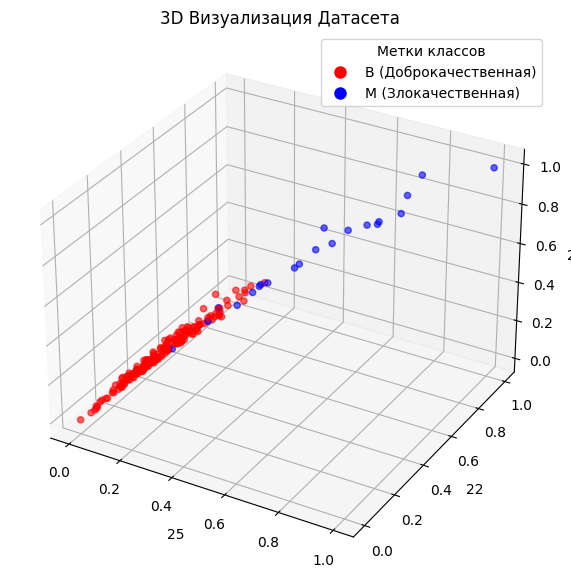

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Извлечь 3 лучших признака на основе их оценок
top_features = selected_feature_scores.head(3)  # Получить 3 лучших признака
top_feature_names = top_features['признаки'].values  # Получить имена признаков в виде массива
print(top_feature_names)
# Создать 3D график
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Определить цвета для классов на основе результата
colors = ['r' if label == 0 else 'b' for label in data_normalized[1]]

# Отобразить точки, используя 3 лучших признака
ax.scatter(data_normalized[top_feature_names[0]],
           data_normalized[top_feature_names[1]],
           data_normalized[top_feature_names[2]],
           c=colors, marker='o', alpha=0.6)

# Установить подписи осей
ax.set_xlabel(top_feature_names[0])
ax.set_ylabel(top_feature_names[1])
ax.set_zlabel(top_feature_names[2])
ax.set_title('3D Визуализация Датасета')

# Создать легенду
legend_labels = label_encoder.inverse_transform([0, 1])  # Предполагая, что 0 - 'B', а 1 - 'M'
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label=legend_labels[0] + ' (Доброкачественная)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label=legend_labels[1] + ' (Злокачественная)')
]
ax.legend(handles=handles, title='Метки классов')

# Показать график
plt.show()


6. Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 4, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [102]:
# Извлечь 2 лучших признака на основе их оценок
top_2_features = selected_feature_scores.head(2)['признаки'].values

# Использовать только 2 лучших признака и метку класса для классификации
X = data_normalized[top_2_features]
y = data_normalized[1]  # Столбец результата

In [103]:
# Разделить данные на обучающую и тестовую выборки (80% обучение, 20% тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создать и обучить классификатор дерева решений с максимальной глубиной 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Оценить классификатор на тестовой выборке
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {accuracy:.2f}")

Точность на тестовой выборке: 0.97


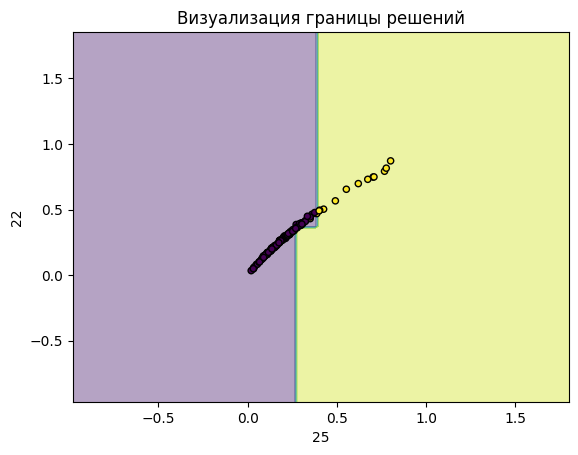

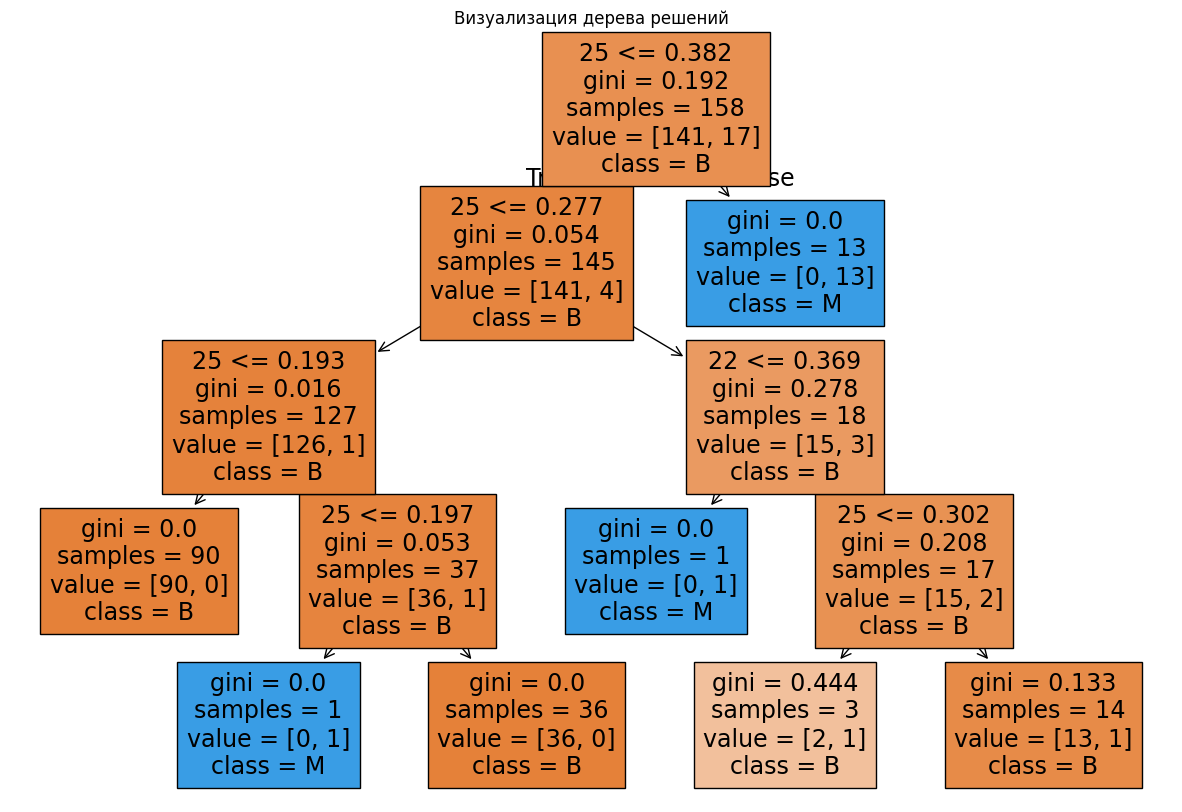

In [104]:
# Визуализировать границу решений, используя 2 лучших признака
def plot_decision_boundary(clf, X, y, feature_names):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Визуализация границы решений")
    plt.show()

# Построить границу решений, используя 2 лучших признака
plot_decision_boundary(clf, X_train, y_train, top_2_features)

# Шаг 6: Визуализировать дерево решений
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=top_2_features, class_names=['B', 'M'], filled=True)
plt.title("Визуализация дерева решений")
plt.show()

7. Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании.


In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [106]:
# Шаг 1: Инициализация классификаторов
# Классификатор Наивного Байеса
nb_classifier = GaussianNB()
# Классификатор K-ближайших соседей с k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Классификатор дерева решений с максимальной глубиной 4
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
# Шаг 2: Обучение классификаторов
# Наивный Байес
nb_classifier.fit(X_train, y_train)
# K-ближайшие соседи
knn_classifier.fit(X_train, y_train)
# Дерево решений
dt_classifier.fit(X_train, y_train)
# Шаг 3: Оценка отдельных классификаторов на тестовой выборке
# Прогнозирование и оценка каждого классификатора
y_pred_nb = nb_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)
# Расчет точности для каждого классификатора
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Вывод результатов работы отдельных классификаторов
print(f"Точность Наивного Байеса: {accuracy_nb:.2f}")
print(f"Точность K-ближайших соседей: {accuracy_knn:.2f}")
print(f"Точность дерева решений: {accuracy_dt:.2f}")


Точность Наивного Байеса: 0.93
Точность K-ближайших соседей: 0.97
Точность дерева решений: 0.97


In [107]:
# Шаг 4: Объединение классификаторов с помощью VotingClassifier (жесткое голосование)
voting_clf = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('knn', knn_classifier),
    ('dt', dt_classifier)], voting='hard')

# Шаг 5: Обучение VotingClassifier
voting_clf.fit(X_train, y_train)
# Шаг 6: Оценка VotingClassifier на тестовой выборке
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
# Вывод производительности объединенного классификатора
print(f"Точность объединенного классификатора: {accuracy_voting:.2f}")

Точность объединенного классификатора: 0.97


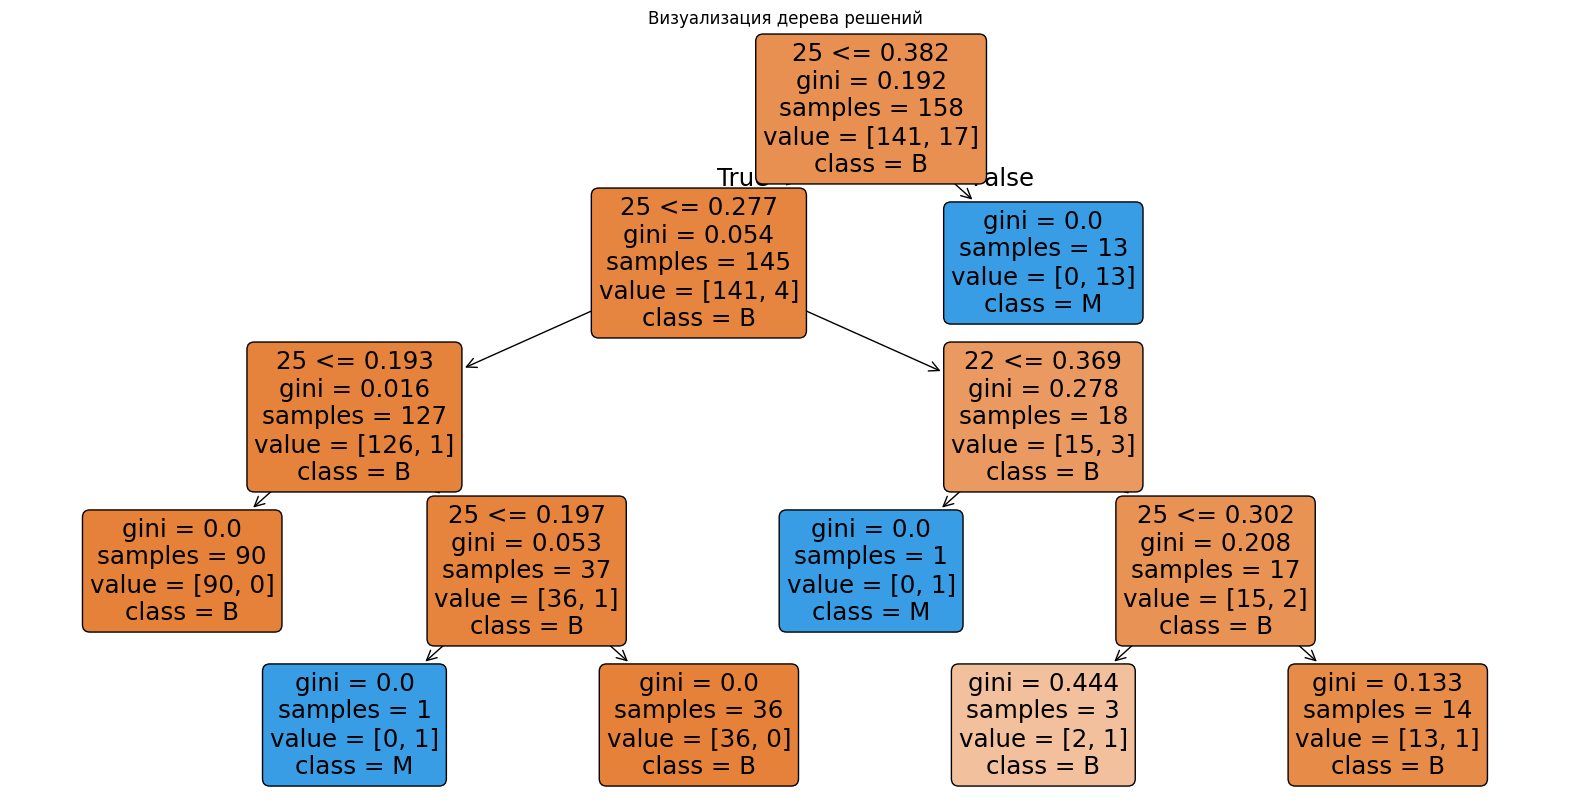

In [108]:
# Построить дерево решений
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['B', 'M'], rounded=True)
plt.title("Визуализация дерева решений")
plt.show()

8. Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании.


In [109]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [110]:
# Инициализация ансамблевых классификаторов
# BaggingClassifier с деревом решений в качестве базового оценщика
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=50, random_state=42)
# RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
# Обучение ансамблевых классификаторов
# BaggingClassifier
bagging_clf.fit(X_train, y_train)
# RandomForestClassifier
rf_clf.fit(X_train, y_train)
# Оценка классификаторов на тестовой выборке
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
# Прогнозирование и оценка RandomForestClassifier
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Вывод производительности классификаторов
print(f"Точность BaggingClassifier: {accuracy_bagging:.2f}")
print(f"Точность RandomForestClassifier: {accuracy_rf:.2f}")

Точность BaggingClassifier: 0.97
Точность RandomForestClassifier: 0.97


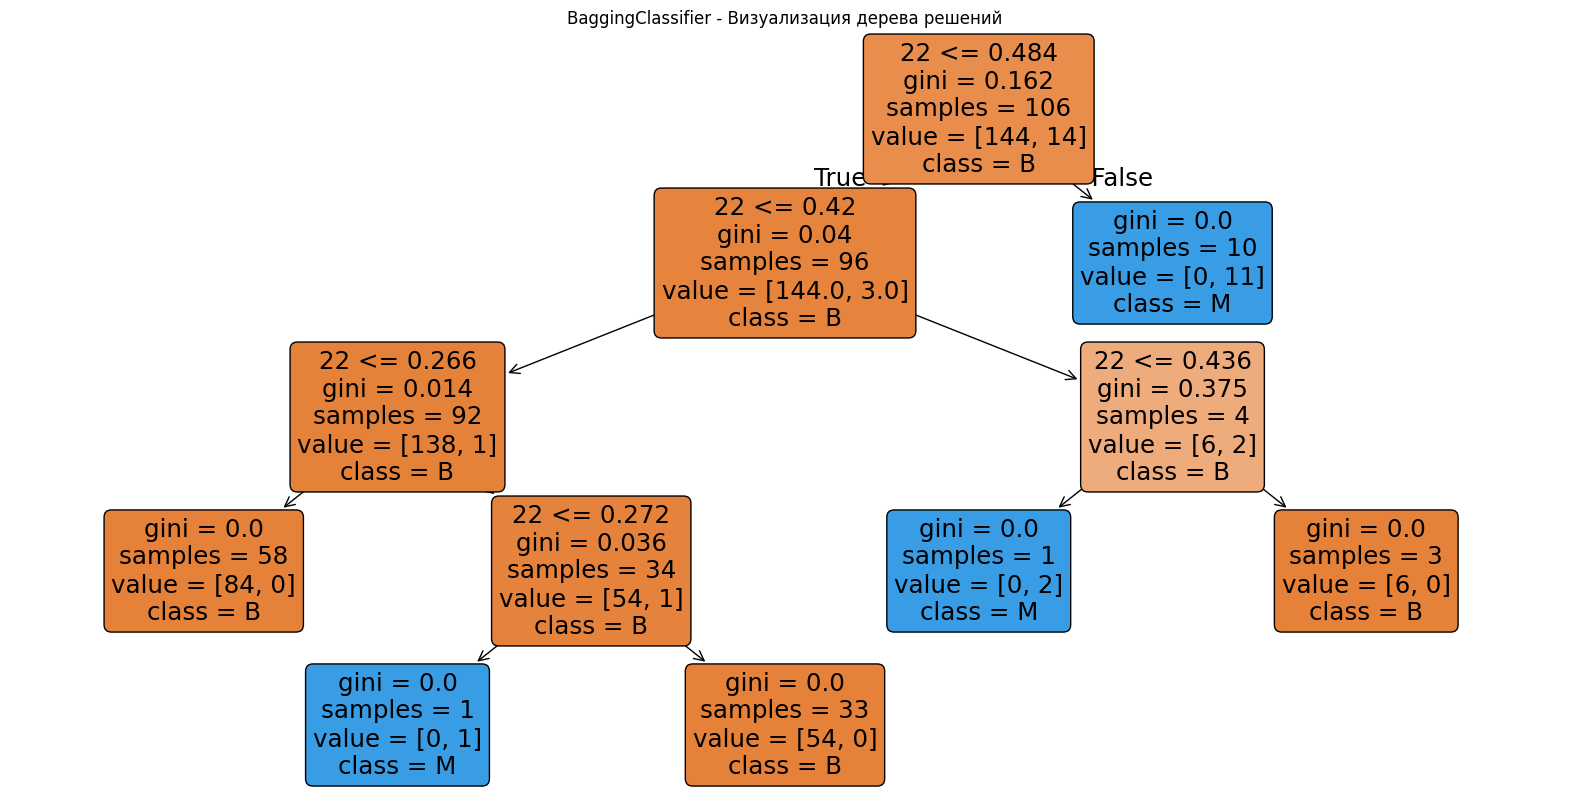

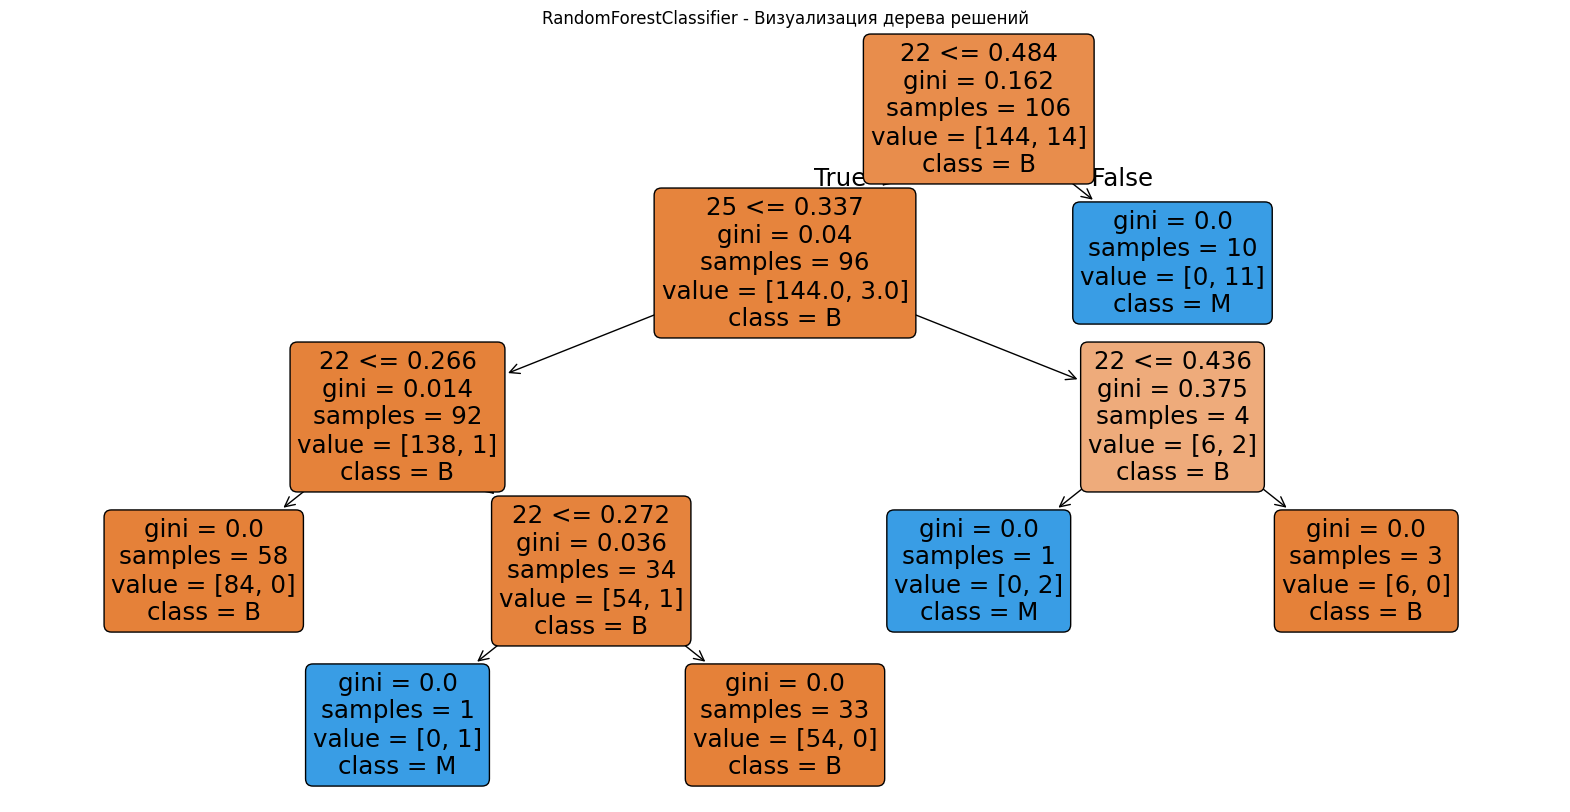

In [111]:
# Выбрать одно дерево из ансамбля BaggingClassifier
bagging_tree = bagging_clf.estimators_[0]
# Выбрать одно дерево из ансамбля RandomForestClassifier
rf_tree = rf_clf.estimators_[0]
# Построить первое дерево BaggingClassifier
plt.figure(figsize=(20, 10))
plot_tree(bagging_tree, filled=True, feature_names=X_train.columns, class_names=['B', 'M'], rounded=True)
plt.title("BaggingClassifier - Визуализация дерева решений")
plt.show()
# Построить первое дерево RandomForestClassifier
plt.figure(figsize=(20, 10))
plot_tree(rf_tree, filled=True, feature_names=X_train.columns, class_names=['B', 'M'], rounded=True)
plt.title("RandomForestClassifier - Визуализация дерева решений")
plt.show()


9. Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок.


In [112]:
from matplotlib.colors import ListedColormap

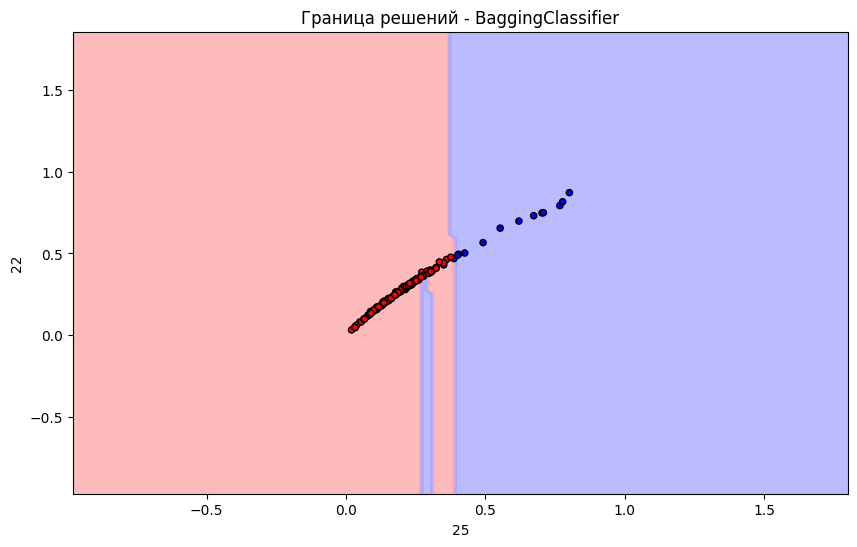

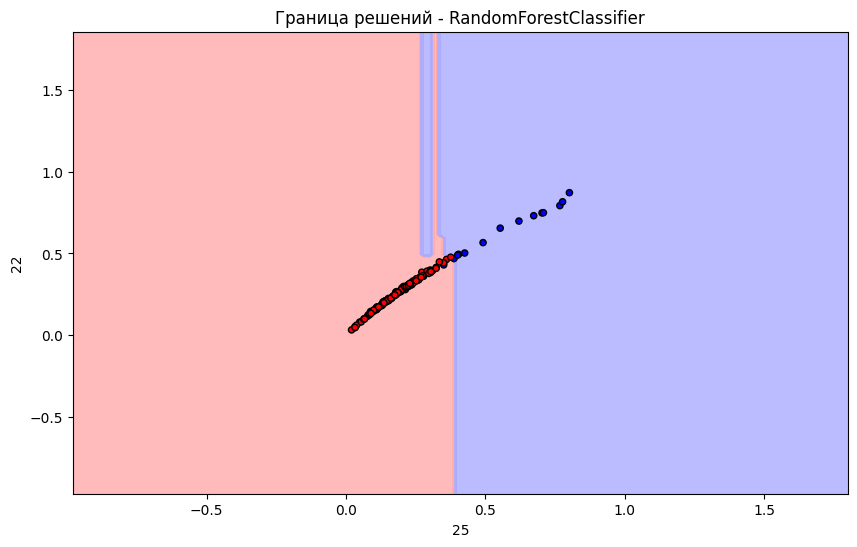

In [113]:
# Функция для отображения границ решений
def plot_decision_boundary(clf, X, y, title):
    # Определение цветовых карт
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Создание сетки для построения графиков
    h = .02  # размер шага в сетке
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Прогнозирование для каждой точки в сетке
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение границы решений и точек данных
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

# выбрать два самых важных признака из SelectKBest)
X_train_2d = X_train.iloc[:, :2]  # Использовать первые два признака для простоты
X_test_2d = X_test.iloc[:, :2]    # То же самое для тестовых данных

# Построить границы решений для BaggingClassifier
plot_decision_boundary(bagging_clf, X_train_2d, y_train, "Граница решений - BaggingClassifier")

# Построить границы решений для RandomForestClassifier
plot_decision_boundary(rf_clf, X_train_2d, y_train, "Граница решений - RandomForestClassifier")